In [3]:
import os
import pandas as pd

In [4]:
def load_imdb_data(directory):
    data = {'review': [], 'sentiment': []}
    for label in ['pos', 'neg']:
        folder = os.path.join(directory, label)
        for file in os.listdir(folder):
            with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
                data['review'].append(f.read())
                data['sentiment'].append(1 if label== 'pos' else 0)
    return pd.DataFrame(data)

train_dir = './aclimdb/train'
df_train = load_imdb_data(train_dir)
df_train.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [5]:
print(df_train['sentiment'].value_counts())
print("Total samples: ", len(df_train))
print("Average review length: ", df_train['review'].apply(len).mean())

sentiment
1    12500
0    12500
Name: count, dtype: int64
Total samples:  25000
Average review length:  1325.06964


In [6]:
import re
from bs4 import BeautifulSoup

In [7]:
def clean_text(text):
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'[^a-zA-Z]', ' ', text)
  text = text.lower()
  text = re.sub(r'\s+', ' ', text).strip()
  return text

df_train['cleaned_review'] = df_train['review'].apply(clean_text)
df_train.head()

,review,sentiment,cleaned_review
0,Bromwell High is a cartoon comedy. It ran at t...,1,bromwell high is a cartoon comedy it ran at th...
1,Homelessness (or Houselessness as George Carli...,1,homelessness or houselessness as george carlin...
2,Brilliant over-acting by Lesley Ann Warren. Be...,1,brilliant over acting by lesley ann warren bes...
3,This is easily the most underrated film inn th...,1,this is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...,1,this is not the typical mel brooks film it was...


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words= 'english',
    max_features= 10000,
    ngram_range= (1, 2)
)

X = vectorizer.fit_transform(df_train['cleaned_review'])
y = df_train['sentiment']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.2, random_state= 42
)

In [10]:
print("Shape of TF-IDF matrix: ", X.shape)
print("Train set size: ", X_train.shape)
print("Test set size: ", X_test.shape)

Shape of TF-IDF matrix:  (25000, 10000)
Train set size:  (20000, 10000)
Test set size:  (5000, 10000)


In [11]:
from sklearn.metrics import accuracy_score, classification_report
import time

def train_and_evaluate(model, model_name):
    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end = time.time()

    print(f"\n📌 Model: {model_name}")
    print(f"⏱️ Training Time: {end - start:.2f} seconds")
    print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("🔍 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
train_and_evaluate(lr, "Logistic Regression")


📌 Model: Logistic Regression
⏱️ Training Time: 0.64 seconds
✅ Accuracy: 0.8870
🔍 Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.87      0.88      2485
    Positive       0.88      0.90      0.89      2515

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



## Multinomial Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
train_and_evaluate(nb, "Naive Bayes")


📌 Model: Naive Bayes
⏱️ Training Time: 0.05 seconds
✅ Accuracy: 0.8652
🔍 Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.86      2485
    Positive       0.86      0.87      0.87      2515

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



## Support Vector Machine

In [26]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
train_and_evaluate(svc, "Linear SVC")


📌 Model: Linear SVC
⏱️ Training Time: 1.15 seconds
✅ Accuracy: 0.8816
🔍 Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.87      0.88      2485
    Positive       0.88      0.89      0.88      2515

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 100, random_state= 42)
train_and_evaluate(rf, "Random Forest")


📌 Model: Random Forest
⏱️ Training Time: 290.13 seconds
✅ Accuracy: 0.8398
🔍 Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84      2485
    Positive       0.86      0.82      0.84      2515

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state= 42)
train_and_evaluate(dt, "Decision Tree")


📌 Model: Decision Tree
⏱️ Training Time: 73.24 seconds
✅ Accuracy: 0.7134
🔍 Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.71      0.71      2485
    Positive       0.72      0.71      0.71      2515

    accuracy                           0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000



In [27]:
results = []

def record_results(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((model_name, acc))

record_results("Logistic Regression", lr, X_test, y_test)
record_results("Naive Bayes", nb, X_test, y_test)
record_results("Linear SVC", svc, X_test, y_test)
record_results("Random Forest", rf, X_test, y_test)
record_results("Decision Tree", dt, X_test, y_test)

import pandas as pd
df_results = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print(df_results)

                 Model  Accuracy
0  Logistic Regression    0.8870
2           Linear SVC    0.8816
1          Naive Bayes    0.8652
3        Random Forest    0.8398
4        Decision Tree    0.7134


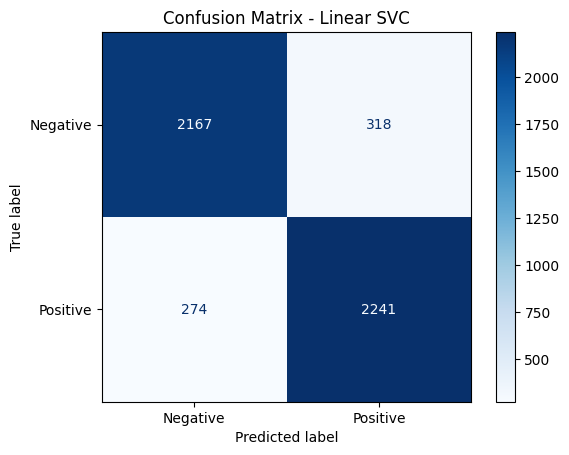

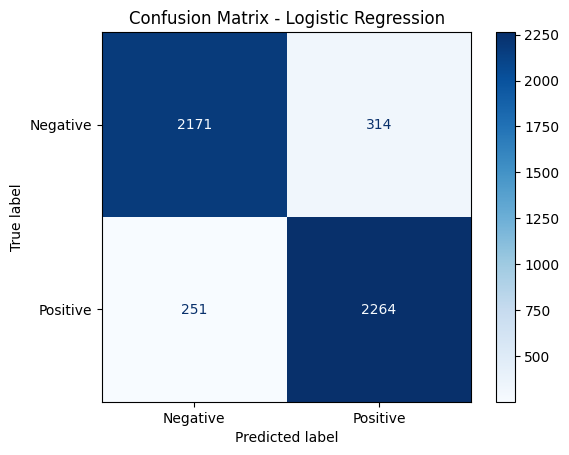

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues')
    disp.ax_.set_title(f"Confusion Matrix - {model_name}")

plot_confusion_matrix(svc, "Linear SVC")
plot_confusion_matrix(lr, "Logistic Regression")


In [22]:
import joblib

# Save model
# joblib.dump(svc, "sentiment_model.pkl")
joblib.dump(lr, "sentiment_model_lr.pkl")

# Save vectorizer
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [ ]:
# Load the saved model and vectorizer
loaded_model = joblib.load("sentiment_model_lr.pkl")
loaded_vectorizer = joblib.load("tfidf_vectorizer.pkl")

In [ ]:
def predict_sentiment(review):
    review_cleaned = clean_text(review)
    review_vectorized = loaded_vectorizer.transform([review_cleaned])
    prediction = loaded_model.predict(review_vectorized)[0]
    return "Positive 😊" if prediction == 1 else "Negative 😞"

In [ ]:
print(predict_sentiment("This movie was an absolute masterpiece with brilliant performances!"))
print(predict_sentiment("Terrible plot and bad acting. Waste of time."))

Positive 😊
Negative 😞
